In [3]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, math
from sklearn.model_selection import train_test_split

In [4]:
df =  pd.read_csv("data.csv")

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.loc[df["gender"]=="male","gender"] = 0.
df.loc[df["gender"]=="female","gender"] = 1.

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,1.0,group B,bachelor's degree,standard,none,72,72,74
1,1.0,group C,some college,standard,completed,69,90,88
2,1.0,group B,master's degree,standard,none,90,95,93
3,0.0,group A,associate's degree,free/reduced,none,47,57,44
4,0.0,group C,some college,standard,none,76,78,75


In [8]:
x = df[["math_score","reading_score"]].to_numpy()
y = df["gender"].to_numpy()

In [9]:
print(x[:5,:])
print(y[:5])

[[72 72]
 [69 90]
 [90 95]
 [47 57]
 [76 78]]
[1.0 1.0 1.0 0.0 0.0]


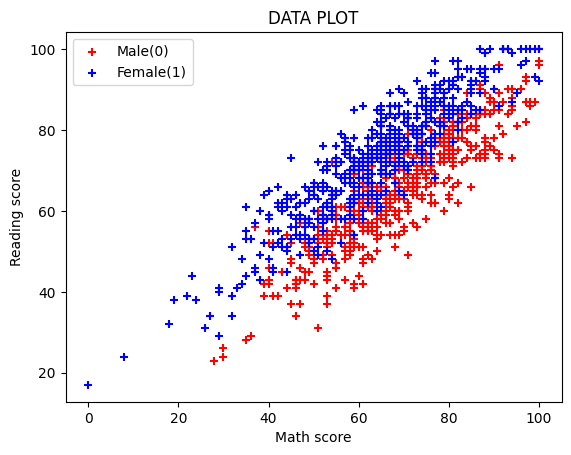

In [10]:
female_data = x[y == 1.]
male_data = x[y == 0.]

plt.scatter(male_data[:, 0], male_data[:, 1], c='red', label='Male(0)', marker='+')

plt.scatter(female_data[:, 0], female_data[:, 1], c='blue', label='Female(1)', marker='+')


plt.xlabel('Math score')
plt.ylabel('Reading score')
plt.title('DATA PLOT')

plt.legend()

plt.show()

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [31]:
def cal_a(x,w,b):
    z = np.dot(x,w) + b
    z = z.astype(float)
    a = 1/(1+np.exp(-z))
    return a

In [32]:
def cal_cost(x,y,w,b):
    a = cal_a(x,w,b)
    m = y.shape[0]
    cost = (1/m)*(-1)*sum((y*np.log(a)) + ((1-y)*np.log(1-a)))
    return cost

In [33]:
def cal_slop(x,y,w,b):
    a = cal_a(x,w,b)
    m = y.shape[0]
    dj_dw = (1/m)*np.dot((a-y), x)
    dj_db = (1/m)*sum(a-y)
    return dj_dw, dj_db

In [34]:
def gradient_descent(x,y,w,b,iti,alpha):
    jHis = []
    wHis = []
    bHis = []
    check = True
    for i in range(iti):
        dj_dw, dj_db = cal_slop(x,y,w,b)

        w = w - alpha*dj_dw
        b = b - alpha*dj_db

        if check == True:
            print(w,b)
            check = False
        
        jHis.append(cal_cost(x,y,w,b))
        wHis.append(w)
        bHis.append(b)

        if i%(iti/10) == 0 or iti-1 == i:
            print(f"Itiration {i}: {cal_cost(x,y,w,b):2.2f}")

    return jHis, wHis, bHis
        

In [35]:
w = 0.01*(np.random.rand(2) - 0.5)
b = -1
iti = 10000
alpha = 0.0001

JHis, wHis, bHis = gradient_descent(x_train,y_train,w,b,iti,alpha)

[0.0048440098791448175 0.0026397783639808834] -0.9999812345302533
Itiration 0: 0.74
Itiration 1000: 0.48
Itiration 2000: 0.43
Itiration 3000: 0.42
Itiration 4000: 0.41
Itiration 5000: 0.40
Itiration 6000: 0.40
Itiration 7000: 0.40
Itiration 8000: 0.40
Itiration 9000: 0.40
Itiration 9999: 0.40


In [36]:
def predict(x,w,b):
    a = cal_a(x,w,b)
    return a >= 0.5

In [37]:
p = predict(x_test,w,b)
print(f"Accuracy: {np.mean(p == y_test) * 100}")

Accuracy: 51.5


In [38]:
def compute_cost_reg(X, y, w, b, lambda_):
    m, n = X.shape
    cost_without_reg = cal_cost(X, y, w, b)    
    reg_cost = 0.        
    # print(f"cost_without_reg = {cost_without_reg}")
    
    for j in range(n):
        reg_cost += w[j]**2
    # print(lambda_)
    total_cost = cost_without_reg + (lambda_/(2 * m)) * reg_cost
    
    # print(f"total cost = {total_cost}")

    return total_cost

In [39]:
np.random.seed(1)
initial_w = np.zeros(x_train.shape[1])
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(x_train, y_train, initial_w, initial_b, lambda_)

print("Regularized cost :", cost)

Regularized cost : 0.710951984180102


In [40]:
def compute_gradient_reg(X, y, w, b, lambda_, tt): 
    m, n = X.shape 
    dj_dw, dj_db = cal_slop(X, y, w, b)

    for j in range(n):
        dj_dw_j_reg = (lambda_/m)*w[j]
        dj_dw[j] = dj_dw[j]+dj_dw_j_reg   
    
    # for i in range(10):
    #     print(f"dj_dw_j_reg{i} = {dj_dw[i]}")
                    
    return dj_db, dj_dw

In [41]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    m = len(X)
    J_history = []
    w_history = []
    check = True
    for i in range(num_iters):
        # if i==0:
        #     print(f"w_in = {w_in}");
        #     print(f"b_in = {b_in}\n");  
        
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_, i)   

        if check:
            print(f"Before w_in: {w_in}")
        
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db 

        if check:
            print(f"After w_in: {w_in} -= alpha({alpha}) * dj_dw({dj_dw})")
            check = False
        
        # if i<3:
        #     print(f"w_in = {w_in}");
        #     print(f"b_in = {b_in}\n");  

        if i<100000:     
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history

In [42]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(x_train.shape[1])-0.5)
initial_b = -4
#print(initial_w)
lambda_ = 0.001                                        
iterations = 10000
alpha = 0.0001

w,b, J_history,_ = gradient_descent(x_train, y_train, initial_w, initial_b, compute_cost_reg, compute_gradient_reg, alpha, iterations, lambda_)

Before w_in: [-0.00082978  0.00220324]
After w_in: [0.002422989001050886 0.005910615149936639] -= alpha(0.0001) * dj_dw([-32.52768954025146 -37.07370215515057])
Iteration    0: Cost     1.83   
Iteration 1000: Cost     0.51   
Iteration 2000: Cost     0.45   
Iteration 3000: Cost     0.42   
Iteration 4000: Cost     0.41   
Iteration 5000: Cost     0.41   
Iteration 6000: Cost     0.40   
Iteration 7000: Cost     0.40   
Iteration 8000: Cost     0.40   
Iteration 9000: Cost     0.40   
Iteration 9999: Cost     0.40   


In [43]:
p = predict(x_test,w,b)
print(f"Accuracy: {np.mean(p == y_test) * 100}")

Accuracy: 88.0


In [44]:
def plot_J(J,iti):
    i = range(1,iti+1)
    plt.plot(i,J)
    plt.xlabel("Itiration")
    plt.ylabel("Cost")
    plt.title("J vs itiration")
    plt.show()


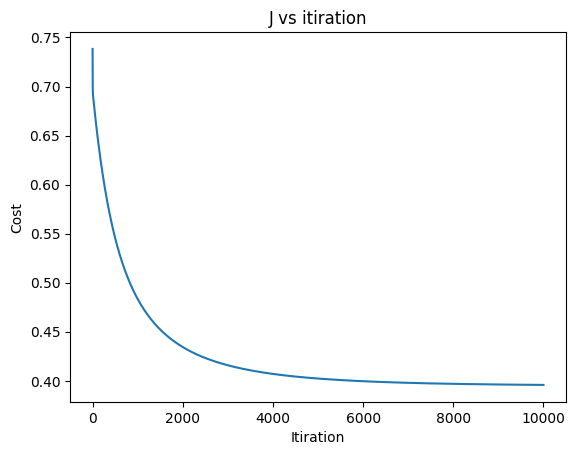

In [45]:
plot_J(JHis,iti)